# Hear begins our exploration of the data!!!

- Hypothesis #1 There will be an interaction between personality combinations and particular drug consumption.  
- Hypothesis #2 some personality and drug combinations will have stronger effects than others. 

## Data set and feature description

### Features:

| Features    | Description |
| :---        | :----       |
| ID          | Identity Number | 
| Age         | Age of participant |  
| Gender      | gender of participant| 
| Education   | level of education of participant|  
| Country     | country of current residence |  
| Ethnicity   | ethnicity of the participant|  
| Nscore      | Neuroticism raw score| 
| Escore      | Extraversion|  
| Oscore      | Openness to experience|  
| Ascore      | Agreeableness (12 - 60)|  
| Cscore      | Conscientiousness (12-60)|  
| Impulsive   | impulsiveness |  
| SS          | sensation-seeking measured by the ImpSS measure|  
| Alcohol     | Alcohol consumption | 
| Amphet      | amphetamine consumption|  
| Amyl        | amyl nitrite consumption|  
| Benzos      | benzodiazepine consumption|  
| Caff        | caffeine consumption|  
| Cannabis    | cannabis consumption|  
| Choc        | chocolate consumption|  
| Coke        | cocaine consumption|  
| Crack       | crack consumption| 
| Ecstasy     | ecstasy consumption|  
| Heroin      | heroin consumption| 
| Ketamine    | ketamine consumption|  
| Legalh      | legal high" (no illegal) consumption|  
| LSD         | LSD consumption|  
| Meth        | methadone consumption |  
| Shrooms     | magic mushrooms consumption| 
| Nicotine    | nicotine consumption|  
| Semer       | alleged consumption of a fictitious drug: Semeron|  
| VSA         | volatile substance consumption|

[Resource Link](https://www.icpsr.umich.edu/web/ICPSR/studies/36536/variables)  



### Import libraries necessary for this project


In [1]:
# data handling libraries
import numpy as np
import pandas as pd

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Model resampling and spliting libraries:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

# Regression / Classifier Libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as smf


# Model Evaluation Libraries:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Plot setting
sns.set(style="whitegrid", color_codes=True)

RSEED=42
testSize = 0.3
sampl_drug = 'Legalh'

### loading the data set

In [2]:
# Load the drug consumption data from drug_consumption_project2.csv
drug_consumption_data = pd.read_csv("data/drug_consumption_project2.csv")


## Exploratory Data Analysis

In [3]:
drug_consumption_data.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [4]:
drug_consumption_data.tail(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [5]:
drug_consumption_data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [6]:
drug_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [7]:
drug_consumption_data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

- From above information aboserved that `Age`, `Gender`, `Education`, `Country`, and  `Ethnicity` are provided in numerical values (float64) but these are catagorical variables. Hence these data have to be converted to catagories in terms of integer values (from 0 to 1) in following these data is converted:
- no `NaN` values identified 

### Decoding the categorical variable features :

In [8]:
# X_features is the list of independent variables which are considered in this analyses
#X_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X_features = ['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
# drugs is the list of dependent variables.
drugs = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine', 'Semer', 'VSA']

#list of catagorical variable features
cat_features = ['Age', 'Gender', 'Education', 'Country','Ethnicity']


In [9]:
# Creating rough version of classification of drug consumption. Modifing my existing `data` object:
# 1 - if a person used a drug in decade ,year, month, week or day, then let's say that he did consume a drug.
drug_users = ['CL6', 'CL5', 'CL4' ,'CL3', 'CL2']

# 0 - other categories are placed into the group that he did not consume a drug; 
drug_non_users = ['CL0','CL1']
#
# Decoder for user or non-user
def change(a):
    if a in drug_users:
        a = 1
    elif a in drug_non_users:
        a = 0
    return a

In [10]:
for drug in drugs:
    drug_consumption_data[drug]= drug_consumption_data[drug].map(change)

In [11]:
drug_consumption_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0


In [12]:
drug_consumption_data.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,1,1,0,0,0,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,1,0,0,1,1,0,1,1,0,1


In [13]:
# set data index
drug_consumption_data.set_index('ID', inplace = True)
drug_consumption_data

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,1,1,0,0,0,0,1
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,1,0,0,1,1,1,1,1,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,1,0,1,0,1,1,0,0


In [14]:

X = drug_consumption_data[X_features]
y = drug_consumption_data['Legalh']

# Model Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('X train data size :',X_train.shape[0],' and X test data size :',X_test.shape[0])


X train data size : 1508  and X test data size : 377


Drug : Alcohol 	 Non User: 68 	 User: 1817 	 Proportion: 0.04 	 : 1
Drug : Amphet 	 Non User: 1206 	 User: 679 	 Proportion: 1.78 	 : 1
Drug : Amyl 	 Non User: 1515 	 User: 370 	 Proportion: 4.09 	 : 1
Drug : Benzos 	 Non User: 1116 	 User: 769 	 Proportion: 1.45 	 : 1
Drug : Caff 	 Non User: 37 	 User: 1848 	 Proportion: 0.02 	 : 1
Drug : Cannabis 	 Non User: 620 	 User: 1265 	 Proportion: 0.49 	 : 1
Drug : Choc 	 Non User: 35 	 User: 1850 	 Proportion: 0.02 	 : 1
Drug : Coke 	 Non User: 1198 	 User: 687 	 Proportion: 1.74 	 : 1
Drug : Crack 	 Non User: 1694 	 User: 191 	 Proportion: 8.87 	 : 1
Drug : Ecstasy 	 Non User: 1134 	 User: 751 	 Proportion: 1.51 	 : 1
Drug : Heroin 	 Non User: 1673 	 User: 212 	 Proportion: 7.89 	 : 1
Drug : Ketamine 	 Non User: 1535 	 User: 350 	 Proportion: 4.39 	 : 1
Drug : Legalh 	 Non User: 1123 	 User: 762 	 Proportion: 1.47 	 : 1
Drug : LSD 	 Non User: 1328 	 User: 557 	 Proportion: 2.38 	 : 1
Drug : Meth 	 Non User: 1468 	 User: 417 	 Proportion: 3.

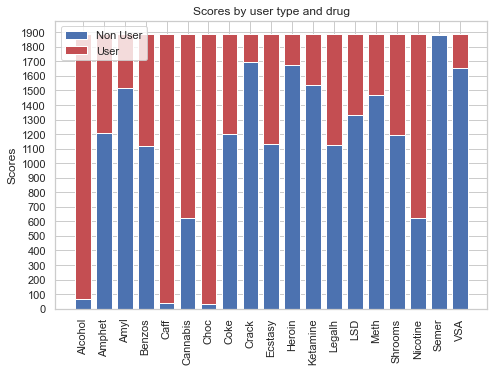

In [15]:
# Check the data balance interms user or Non User in each drug catagory:
class_0 = []
class_1 = []
for drug in drugs:
    cl0 = drug_consumption_data.groupby(drug).count()['Impulsive'][0]
    cl1 = drug_consumption_data.groupby(drug).count()['Impulsive'][1]

    class_0.append(cl0)
    class_1.append(cl1)
    print('Drug :',drug,'\t','Non User:', cl0, '\t','User:', cl1,'\t',
        'Proportion:', round(cl0 / cl1, 2), '\t',': 1')
width = 0.75
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(drugs, class_0, width, color='b')
ax.bar(drugs, class_1, width,bottom=class_0, color='r')
ax.set_ylabel('Scores')
ax.set_title('Scores by user type and drug')
plt.xticks(rotation=90)

#ax.set_xticks(drugs, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 2000, 100))
ax.legend(labels=['Non User', 'User'])
plt.show()

In [16]:
# Model splitt
def model_split(X_sp,y_sp):
    X_res, y_res = rus.fit_resample(X_sp,y_sp)
    if len(X_res) > 50 :
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = RSEED)
        print('UnderSampler: X train data size :',X_train.shape[0],' and X test data size :',X_test.shape[0])
    else:
        X_res, y_res = ros.fit_resample(X_sp,y_sp)
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = RSEED)
        print('OverSampler: X train data size :',X_train.shape[0],' and X test data size :',X_test.shape[0])
    return X_train, X_test, y_train, y_test

## Regression & Classifier models

In [17]:
#lin_reg = LinearRegression()
log_reg = LogisticRegression(random_state=RSEED)
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier(random_state=RSEED)
#lsv_clf = LinearSVC()
#knn_clf = KNeighborsClassifier()
#ds_clf = DecisionTreeClassifier(random_state=RSEED)

rus = RandomUnderSampler()
ros = RandomOverSampler()


In [18]:
# Evaluation: roc curve and auc calculate roc curve
def model_evaluation(X_train, X_test, y_train, y_test, model):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train, y_train)
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC curve for {y_test.name}')

    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    #return testX, testy

Train result f1 score = 0.648
Test result f1 score = 0.676
Train result accuracy  = 0.733
Test result accuracy = 0.745


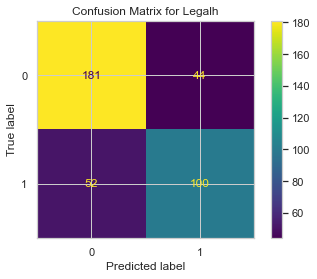

In [19]:
#Evalation of model
model = log_reg
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
f1_train = metrics.f1_score(y_train,y_train_predict)
f1_test = metrics.f1_score(y_test,y_test_predict)

#
disp1 = plot_confusion_matrix(model.fit(X_train, y_train),X_test,y_test)
disp1.ax_.set_title(f'Confusion Matrix for {y_test.name}')
accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))
accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))
print("Train result f1 score = %0.3f" % f1_train)
print("Test result f1 score = %0.3f"% f1_test)
print('Train result accuracy  = %0.3f' % accuracy_train)
print('Test result accuracy = %0.3f' % accuracy_test)
#print()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.826


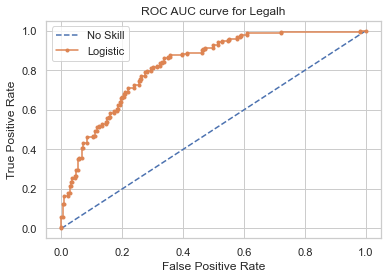

In [20]:
model_evaluation(X_train, X_test, y_train, y_test, model)

# GridSearchCV

In [21]:
estimators = [log_reg,rf_clf,ada_clf]

In [22]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score
# Model split
drug = 'Legalh'
y = drug_consumption_data[drug]
X_train, X_test, y_train, y_test = model_split(X,y)
# TODO: Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=RSEED) 

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120],                
              'learning_rate':[0.1, 0.5, 1.],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, verbose=1, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

UnderSampler: X train data size : 1219  and X test data size : 305
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Users/Shared/github/projects/impact_personality_drug_use/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Unoptimized model
------
Accuracy score on testing data: 0.6984
F-score on testing data: 0.7170

Optimized Model
------
Final accuracy score on the testing data: 0.7475
Final F-score on the testing data: 0.7491
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=42)


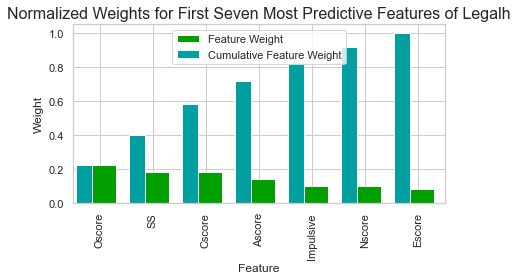

In [23]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier


# Import functions from own Python-File (see visuals_script.py in Repo)
import visuals_script as vs

# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

Final Model trained on full data
------
Accuracy on testing data: 0.7475
F-score on testing data: 0.7491

Final Model trained on reduced data
------
Accuracy on testing data: 0.7475
F-score on testing data: 0.7491


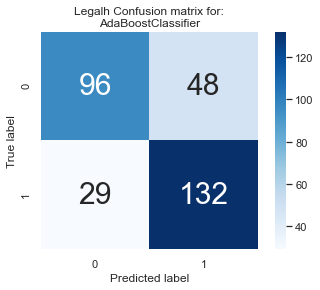

In [24]:
# Import functionality for cloning a model
from sklearn.base import clone
from sklearn.metrics import confusion_matrix


# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:7]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:7]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
cm = confusion_matrix(y_test, clf.predict(X_test_reduced))

sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
        cmap='Blues', square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'{drug} Confusion matrix for:\n{(model.__class__.__name__)}');


Legalh LogisticRegression(random_state=42)  :Accuracy on testing data: 0.7443
Legalh LogisticRegression(random_state=42)  :F-score on testing data: 0.7491
Legalh RandomForestClassifier()  :Accuracy on testing data: 0.7508
Legalh RandomForestClassifier()  :F-score on testing data: 0.7562
Legalh AdaBoostClassifier(random_state=42)  :Accuracy on testing data: 0.7377
Legalh AdaBoostClassifier(random_state=42)  :F-score on testing data: 0.7422


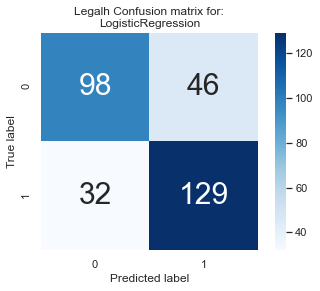

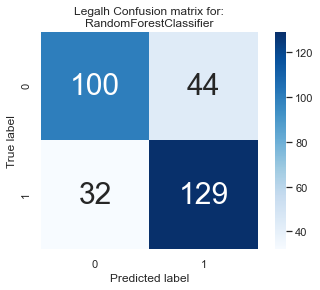

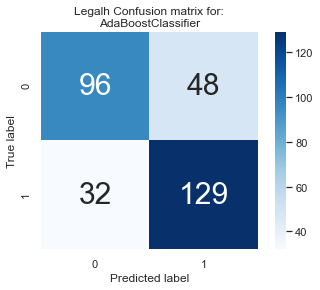

In [25]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix
for i,model in enumerate(estimators):
    model.fit(X_train_reduced,y_train)
    print(drug, model," :Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, model.predict(X_test_reduced))))
    print(drug, model, " :F-score on testing data: {:.4f}".format(fbeta_score(y_test, model.predict(X_test_reduced), beta = 0.5)))
    cm = confusion_matrix(y_test, model.predict(X_test_reduced))
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.title(f'{drug}Confusion matrix for:\n{}'.format(model.__class__.__name__));
    plt.title(f'{drug} Confusion matrix for:\n{(model.__class__.__name__)}');


In [26]:
drug_consumption_data.corr()[['Ecstasy','Cannabis','LSD','Legalh']][5:12]

,Ecstasy,Cannabis,LSD,Legalh
Nscore,0.097871,0.139650,0.048026,0.113159
Escore,0.044712,-0.038804,0.006806,-0.023002
Oscore,0.293111,0.350217,0.341423,0.352796
Ascore,-0.122575,-0.167688,-0.099984,-0.112480
Cscore,-0.223107,-0.271942,-0.159594,-0.246766
Impulsive,0.251383,0.295244,0.228748,0.263547
SS,0.399253,0.409804,0.360903,0.418035
